<a href="https://colab.research.google.com/github/Animesh-Guchhait/Taming-Text-with-the-SVD/blob/main/Movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords, words
from nltk import wordpunct_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from copy import deepcopy
import random
from sklearn.feature_extraction.text import CountVectorizer
from oxforddictionaries.words import OxfordDictionaries
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA 

In [ ]:
en_words = set(words.words())

In [ ]:
# Function to remove stop words
def remove_sw(words):
    stop_words = set(stopwords.words('english'))
    return [i for i in words if i not in stop_words]

In [ ]:
def text_clean(file):
    file = deepcopy(file)
    file = ' '.join( [w for w in file.split() if len(w)>1] ).strip()
    file = re.sub(" \d+", " ", file).strip()
    return file
def noneng_rm(file_words):
    return [w for w in file_words if w.lower() in en_words or not w.isalpha()]
def rem_words(df,words):
    temp = []
    for word in words:
        try:
            if (df.loc[word,:] == 0).count() > 1:
                temp.append(word)
        except:
            pass
    return temp

In [ ]:
def rem_one(df):
    df = deepcopy(df)
    rows_to_drop = []
    for i in df.iterrows():
        n = 0
        for j in df.columns:
            if df[j][i] != 0:
                n += 1
        if n <= 5:
            rows_to_drop.append(i)
    return df.drop(rows_to_drop, inplace=False, axis=0)

In [ ]:
def stem_words(words):
    ps = PorterStemmer()
    for i in range(len(words)):
        words[i] = ps.stem(words[i])
    return words

In [ ]:
def syns(words):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(words)):
        words[i] = lemmatizer.lemmatize(words[i])
    return words

In [ ]:
def file_formatting(filenames):
    fnames = deepcopy(filenames)
    files = []
    c = 0
    for filename in fnames:
        if c ==3000:
            break
        try:
            #if filenames[0][-3:] != 'txt':
            #print(7/0)
            file = open(filename,'r').read()
            file = file.replace('\n', ' ')
            file = re.sub(r'[^a-zA-Z0-9 ]', ' ', file)
            file = re.sub(' +', ' ', file)
            file = file.strip()
            files.append(file)
            c += 1
        except:
            ind = filenames.index(filename)
            filenames.pop(ind)
    return files

In [ ]:
'''
def PCA(A , n_components):
    mean_cols = A.mean(axis=0)
    B = A - mean_cols
    C = B.T@B
    eigen_values , eigen_vectors = np.linalg.eig(C)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    df_reduced = np.dot(eigenvector_subset.transpose() , B.T).transpose()
    print(pd.DataFrame(mean_cols))
    return df_reduced, sorted_eigenvalue
'''

'\ndef PCA(A , n_components):\n    mean_cols = A.mean(axis=0)\n    B = A - mean_cols\n    C = B.T@B\n    eigen_values , eigen_vectors = np.linalg.eig(C)\n    sorted_index = np.argsort(eigen_values)[::-1]\n    sorted_eigenvalue = eigen_values[sorted_index]\n    sorted_eigenvectors = eigen_vectors[:,sorted_index]\n    eigenvector_subset = sorted_eigenvectors[:,0:n_components]\n    df_reduced = np.dot(eigenvector_subset.transpose() , B.T).transpose()\n    print(pd.DataFrame(mean_cols))\n    return df_reduced, sorted_eigenvalue\n'

In [ ]:
def SVD(df , n_components):
    u , sigma, vt = np.linalg.svd(df)
    df_svd = np.transpose(np.transpose(u[:,:n_components])@np.array(df))
    return df_svd

In [ ]:
def svd_var(df):
    u,s,vt = np.linalg.svd(df)
    var_explained = np.round(s**2/np.sum(s**2), decimals=3)
    return var_explained, s

In [ ]:
def tdf_matrix(files, filename,words):
    corpus = files
    df = pd.DataFrame(data=corpus, columns=['sentences'])
    
    vectorizer = CountVectorizer(vocabulary=words, min_df=0,
                             stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
    X = vectorizer.fit_transform(df['sentences'].values)

    df = pd.DataFrame(data=np.transpose(X.toarray()), index=vectorizer.get_feature_names(), columns = filenames)

    return df.T

___

In [ ]:
filenames = os.listdir()
files = []

In [ ]:
files = file_formatting(filenames)
len(files)

2000

In [ ]:
all_words = []
for i in files:
    all_words +=  i.split()
all_words = set(all_words)

# Unclean Matrix

In [ ]:
tdf = tdf_matrix(files, filenames, all_words)
tdf

,0,00,000,0009f,007,00s,03,04,05,05425,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
cv000_29416.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv000_29590.txt,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_18431.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_19502.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv002_15918.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv997_5152.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_14111.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_15691.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv999_13106.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___

## Cleaning text

In [ ]:
all_words_cleaned = []
all_words_cleaned = text_clean(' '.join(all_words)).split()

In [ ]:
all_words_cleaned = noneng_rm(all_words_cleaned)
#all_words_cleaned = rem_words(tdf, all_words_cleaned)

In [ ]:
len(all_words)

39399

In [ ]:
all_words_cleaned = set(all_words_cleaned)

In [ ]:
len(all_words_cleaned)

18481

___

## TDF matrix for cleaned text

In [ ]:
tdf_cleaned = tdf_matrix(files, filenames, all_words_cleaned)
tdf_cleaned

,a,aa,aback,abandon,abandoned,abandonment,abdomen,abduction,aberration,abeyance,...,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zoom,zorro
cv000_29416.txt,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv000_29590.txt,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_18431.txt,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_19502.txt,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv002_15918.txt,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv997_5152.txt,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_14111.txt,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_15691.txt,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv999_13106.txt,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SVD of cleaned text

<AxesSubplot:xlabel='SV', ylabel='Percent Variance Explained'>

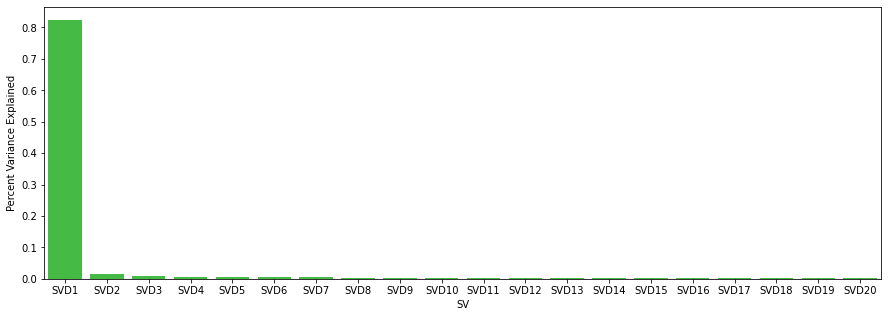

In [ ]:
plt.figure(figsize = (15,5))
var_cleaned, s_cleaned = svd_var(tdf_cleaned.T)
lst = ['SVD'+str(i+1) for i in range(len(var_cleaned))]
svd_var_cleaned = pd.DataFrame({'Percent Variance Explained':var_cleaned[:20], 'SV':lst[:20]})
sns.barplot(x='SV',y="Percent Variance Explained", data=svd_var_cleaned, color="limegreen")

### Singular values

In [ ]:
pd.DataFrame(np.diag(s_cleaned))

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,2981.687605,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,413.361633,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,0.000000,289.745103,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,0.000000,0.000000,259.83393,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,0.000000,0.000000,0.00000,244.530923,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.435846,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1996,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.093357,0.000000e+00,0.000000e+00,0.000000e+00
1997,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.324138e-12,0.000000e+00,0.000000e+00
1998,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,1.019673e-14,0.000000e+00


In [ ]:
svd_cleaned = SVD(tdf_cleaned.T, 2)
pd.DataFrame(svd_cleaned)

,0,1
0,-62.899026,4.169681
1,-63.331441,-4.946933
2,-60.222017,7.109590
3,-23.730874,4.302947
4,-41.901150,-6.641671
...,...,...
1995,-42.855444,-10.813775
1996,-67.555780,-17.866538
1997,-41.443662,11.407742
1998,-104.610230,-15.221378


## PCA of cleaned text

In [ ]:
pca_cleaned = PCA(n_components = 20)

In [ ]:
pca_cleaned.fit(tdf_cleaned)
variance_cleaned = pca_cleaned.explained_variance_ratio_

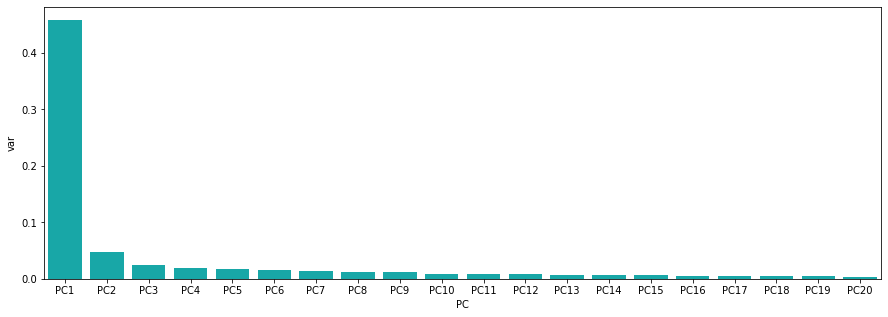

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(variance_cleaned)[:20]))]
pc_var = pd.DataFrame({'var':list(variance_cleaned)[:20],
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");

In [ ]:
pd.DataFrame(np.diag(pca_cleaned.singular_values_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1264.048811,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,403.020699,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,289.451315,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,259.5685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0000,244.509521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0000,0.000000,232.097422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,223.437503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,210.637769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,206.404422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,180.309601,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pd.DataFrame(pca_cleaned.fit_transform(tdf_cleaned)).loc[:,[0,1]]

,0,1
0,2.523870,-3.870502
1,3.404854,5.468999
2,-0.630655,-6.263812
3,-37.015416,-0.669679
4,-17.876160,8.665095
...,...,...
1995,-16.709400,12.859448
1996,8.687631,17.836688
1997,-19.600343,-9.264705
1998,45.305914,12.809502


___

## Removing stop words

In [ ]:
all_words_sw = set(remove_sw(list(all_words_cleaned)))

In [ ]:
len(all_words_sw)

18350

### TDF matrix after removing stop words

In [ ]:
tdf_sw = tdf_matrix(files, filenames, all_words_sw)
tdf_sw

,aa,aback,abandon,abandoned,abandonment,abdomen,abduction,aberration,abeyance,abhorrence,...,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zoom,zorro
cv000_29416.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv000_29590.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_18431.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_19502.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv002_15918.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv997_5152.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_14111.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_15691.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv999_13106.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SVD 

<AxesSubplot:xlabel='SV', ylabel='Percent Variance Explained'>

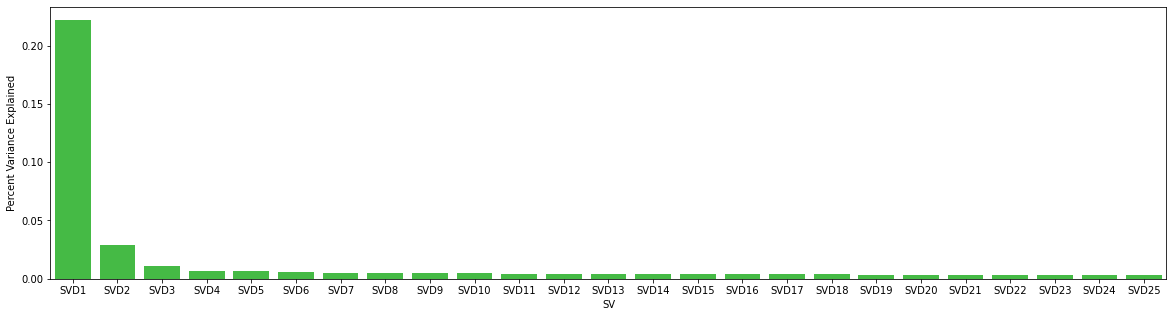

In [ ]:
plt.figure(figsize = (20,5))
var_sw, s_sw = svd_var(tdf_sw.T)
lst = ['SVD'+str(i+1) for i in range(len(var_sw))]
svd_var_sw = pd.DataFrame({'Percent Variance Explained':var_sw[:25], 'SV':lst[:25]})
sns.barplot(x='SV',y="Percent Variance Explained", data=svd_var_sw, color="limegreen")

In [ ]:
pd.DataFrame(np.diag(s_sw))

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,492.196139,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,178.032966,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,0.000000,109.184018,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,0.000000,0.000000,88.372038,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,0.000000,0.000000,0.000000,87.1697,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.322423,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1996,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.187507e-13,0.000000e+00,0.000000e+00,0.000000e+00
1997,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,1.612830e-14,0.000000e+00,0.000000e+00
1998,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,1.388203e-14,0.000000e+00


In [ ]:
svd_sw = SVD(tdf_sw.T, 4)
pd.DataFrame(svd_sw)

,0,1,2,3
0,-12.729570,2.822300,-1.442564,0.540134
1,-9.460026,-1.221651,0.774877,-1.658166
2,-8.910406,-0.162215,0.489460,-0.960984
3,-4.501436,4.873129,-0.973693,-0.832537
4,-5.243241,1.875464,0.820592,-1.992081
...,...,...,...,...
1995,-6.207562,-0.188525,0.894852,0.463614
1996,-13.905610,-6.674810,-5.842881,2.162373
1997,-7.977748,-0.495242,2.422947,-0.881484
1998,-18.367483,2.292898,-0.072883,-4.086615


## PCA 

In [ ]:
pca_sw = PCA(n_components = 20)

In [ ]:
pca_sw.fit(tdf_sw)
variance_sw = pca_sw.explained_variance_ratio_

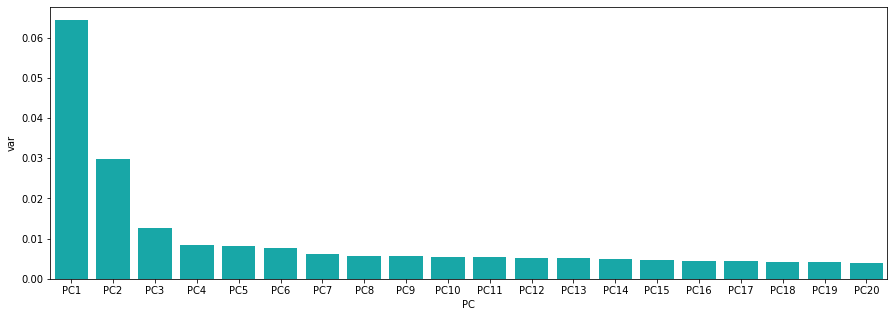

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(variance_sw)[:20]))]
pc_var = pd.DataFrame({'var':list(variance_sw)[:20],
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");

In [ ]:
pd.DataFrame(np.diag(pca_sw.singular_values_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,241.027577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,164.233725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,106.311439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,87.685858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,86.008283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,83.381627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.175687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.299101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.848454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.643891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pd.DataFrame(pca_sw.fit_transform(tdf_cleaned)).loc[:,[0,1]]

,0,1
0,2.523870,-3.870502
1,3.404854,5.468999
2,-0.630655,-6.263812
3,-37.015416,-0.669679
4,-17.876160,8.665095
...,...,...
1995,-16.709400,12.859448
1996,8.687631,17.836688
1997,-19.600343,-9.264705
1998,45.305914,12.809502


___

## Mapping stem words and synonyms to one word

In [ ]:
all_words_stem = set(stem_words(list(all_words_sw)))

In [ ]:
len(all_words_stem)

13698

In [ ]:
all_words_syns = set(syns(list(all_words_stem)))

In [ ]:
len(all_words_syns)

13671

### TDF matrix 

In [ ]:
tdf_syns = tdf_matrix(files, filenames, all_words_syns)
tdf_syns

,aa,aback,abandon,abdomen,abduct,aberr,abey,abhorr,abid,abigail,...,zip,zipper,zippi,zodiac,zombi,zone,zoo,zoologist,zoom,zorro
cv000_29416.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv000_29590.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_18431.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv001_19502.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv002_15918.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv997_5152.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_14111.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv998_15691.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cv999_13106.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SVD 

<AxesSubplot:xlabel='SV', ylabel='Percent Variance Explained'>

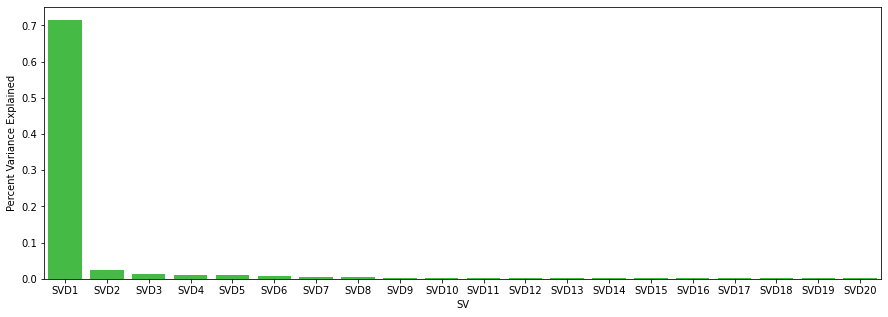

In [ ]:
plt.figure(figsize = (15,5))
var_syns, s_syns = svd_var(tdf_syns.T)
lst = ['SVD'+str(i+1) for i in range(len(var_syns))]
svd_var_syns = pd.DataFrame({'Percent Variance Explained':var_syns[:20], 'SV':lst[:20]})
sns.barplot(x='SV',y="Percent Variance Explained", data=svd_var_syns, color="limegreen")

In [ ]:
pd.DataFrame(np.diag(s_syns))

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1375.926885,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,248.41609,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,0.00000,177.925144,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000,0.00000,0.000000,161.695723,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000,0.00000,0.000000,0.000000,160.375228,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.092691,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1996,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,6.110500e-13,0.000000e+00,0.000000e+00,0.000000e+00
1997,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,6.311400e-15,0.000000e+00,0.000000e+00
1998,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,2.764044e-15,0.000000e+00


In [ ]:
svd_syns = SVD(tdf_syns.T, 2)
pd.DataFrame(svd_syns).loc[:,[0,1]]

,0,1
0,-28.708559,3.094548
1,-23.041470,0.991291
2,-23.363588,3.453812
3,-8.838957,-3.035325
4,-15.750851,-1.031774
...,...,...
1995,-19.238587,-2.378124
1996,-39.122642,-8.581530
1997,-27.215531,-3.831200
1998,-48.406790,-8.314197


## PCA 

In [ ]:
pca_syns = PCA(n_components = 20)

In [ ]:
pca_sw.fit(tdf_syns.T)
variance_syns = pca_syns.explained_variance_ratio_

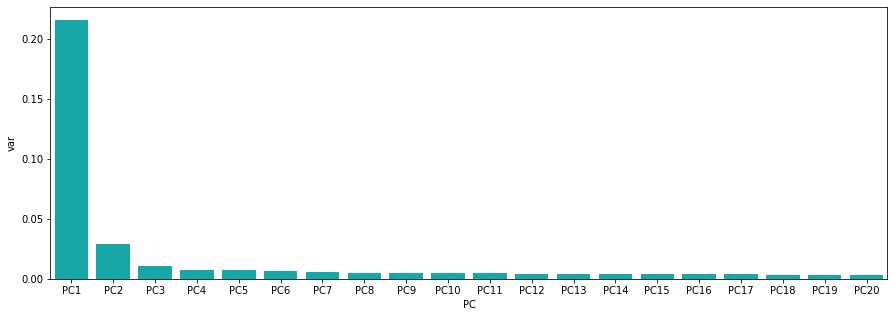

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(variance_syns)[:20]))]
pc_var = pd.DataFrame({'var':list(variance_sw)[:20],
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");

In [ ]:
pd.DataFrame(np.diag(pca_sw.singular_values_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,483.610779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,177.920984,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,108.609548,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,88.127647,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,86.992611,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,83.394377,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.704436,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.42507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,71.958535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,71.185897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pd.DataFrame(pca_sw.fit_transform(tdf_cleaned)).loc[:,[0,1]]

,0,1
0,2.523870,-3.870502
1,3.404854,5.468999
2,-0.630655,-6.263812
3,-37.015416,-0.669679
4,-17.876160,8.665095
...,...,...
1995,-16.709400,12.859448
1996,8.687631,17.836688
1997,-19.600343,-9.264705
1998,45.305914,12.809501


## PCA with mean centered data

___

In [ ]:
pca = PCA(n_components = 20)

In [ ]:
pca.fit(tdf_syns.T-tdf_syns.T.mean())

PCA(n_components=20)

In [ ]:
pca.singular_values_

array([1372.59229087,  248.3909018 ,  177.92442819,  161.6945907 ,
        160.36218192,  143.25165764,  111.89676083,   97.71643475,
         92.008273  ,   85.89936367,   81.1355836 ,   79.48486184,
         76.07494224,   73.06647378,   72.25630977,   70.36852206,
         67.48788721,   66.62080785,   65.41355824,   65.13368179])

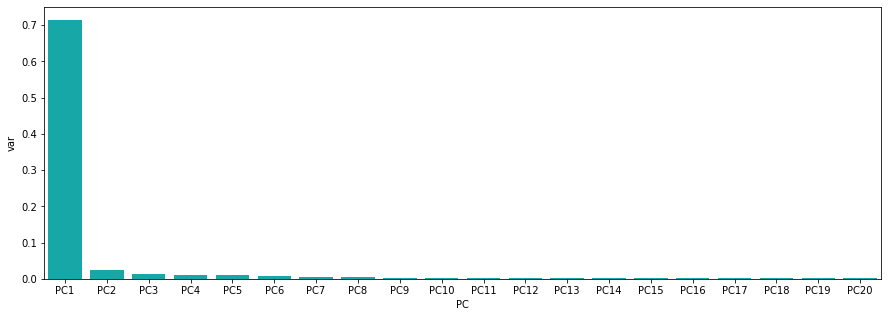

In [ ]:
plt.figure(figsize=(15, 5))
lst = ['PC'+str(i+1) for i in range(len(list(pca.explained_variance_ratio_)[:20]))]
pc_var = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':lst[:20]})
sns.barplot(x='PC',y="var", 
           data=pc_var, color="c");